# Import libraries and utilities

In [1]:
import pandas as pd
import matplotlib.pyplot as pp
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.manifold import TSNE

from logo_util import read_logo

# Read data

In [2]:
data = pd.read_csv("data/data.csv")

# Embedding the Data Into 2 Dimensions

We use a small perplexity as suggested by the [sklearn guide on manifold learning](http://scikit-learn.org/stable/modules/manifold.html#optimizing-t-sne) for small datasets. The value for early exaggeration is smaller than the default (`4.0`) because that leads more visually pleasing plots. The clusters revealed are unchanged.

In [3]:
model = TSNE(perplexity=10, early_exaggeration=1.0,
             # We have only a small dataset (29 parties), so solve exactly with a lot
             # of iterations and a small learning rate
             method="exact",
             n_iter=5000,
             learning_rate=10, 
             # I think it makes sense to have the distance between two parties grow
             # linearly with the number of different answers
             metric="cityblock")

X = model.fit_transform(data.as_matrix().T)

In [4]:
# Normalize coordinates so that we get a square plot in the end
X = (X - X.mean(axis=0)) / np.ptp(X, axis=0)

# Plotting the Embeddings

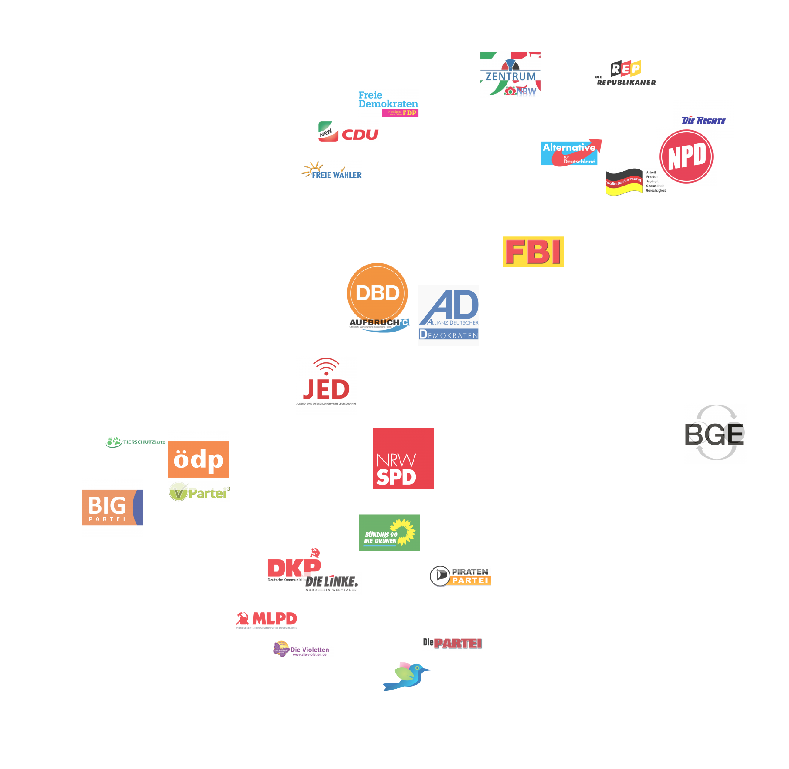

In [5]:
fig, ax = pp.subplots(figsize=(10, 10), dpi=96)

# Set X- and Y-axis limits so that all parties are visible
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
ax.set_xlim(x_min - 0.1 * x_range, x_max + 0.1 * x_range)
ax.set_ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)

# Disable distracting axes etc.
ax.axis("off")

# Draw the party logos
#
# We draw the party logos in reverse order so that the main parties are on top`
for i, name in reversed(list(enumerate(data.columns))):
    x, y = X[i, :]
    img = read_logo(name)
    extent = (x - 0.05 * x_range, x + 0.05 * x_range, y - 0.05 * y_range, y + 0.05 * y_range)
    ax.imshow(img, extent=extent, alpha=0.75)
    
pp.show()